Plotting time series
===================

We start by importing pandas and reading in some time series data. The values are sampled once per second in three dimensions and a scalar value is calculated.

In [2]:
import pandas as pd
df = pd.read_json('abisko-20180424.json')
df.head()

,datetime,X,Y,Z,S
0,2018-04-24 00:00:00,11298.95,1775.51,52043.31,53285.23
1,2018-04-24 00:00:01,11298.98,1775.50,52043.37,53285.23
2,2018-04-24 00:00:02,11298.92,1775.49,52043.34,53285.23
3,2018-04-24 00:00:03,11298.91,1775.47,52043.37,53285.28
4,2018-04-24 00:00:04,11298.93,1775.51,52043.37,53285.28


For handling time series it is useful to have the time stamp as the index, so replace that.

In [3]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.index = df['datetime']
del df['datetime']
df.head()

,X,Y,Z,S
datetime,,,,
2018-04-24 00:00:00,11298.95,1775.51,52043.31,53285.23
2018-04-24 00:00:01,11298.98,1775.50,52043.37,53285.23
2018-04-24 00:00:02,11298.92,1775.49,52043.34,53285.23
2018-04-24 00:00:03,11298.91,1775.47,52043.37,53285.28
2018-04-24 00:00:04,11298.93,1775.51,52043.37,53285.28


Now we can simply plot the data with no options.

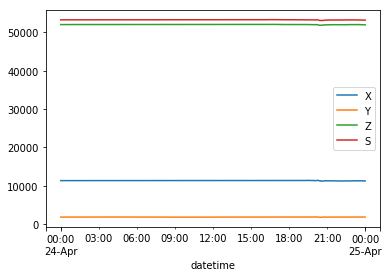

In [7]:
%matplotlib inline
df.plot()

Not very useful! The range of each value is so different it's better to look at just one for now.

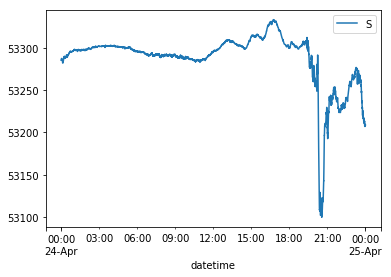

In [8]:
df.plot(y='S')

This is better but with a dat point for every second we could look at subsampling.

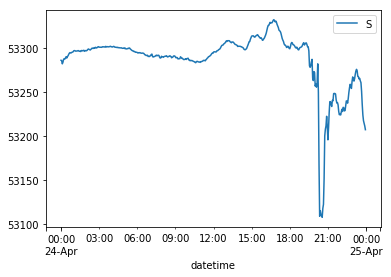

In [9]:
df2 = df.resample('3T').median()
df2.plot(y='S')

matplotlib can produce some good static graphs and charts but if you want to investigate the data graphically then there are other packages. Here's bokeh, though to get the interactivity it relies on JavaScript. Once the graph is rendeered it can be zoomed, panned. A default hover tool has been added to read off data points.

In [10]:
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
from bokeh.io import output_notebook, show
from bokeh.models.tools import HoverTool, CrosshairTool

output_notebook()
source = ColumnDataSource(df2)

p = figure(x_axis_type="datetime", plot_width=800, plot_height=350)
p.line('datetime', 'S', source=source)
p.add_tools(HoverTool())

show(p)

Loading BokehJS ...

The hover over output above isn't that usefule, but bokeh's interactivity is customisable. Here we add a hover tooltip to show the values at the data points as the pointer is moved across the graph. First we generate a column of strings for the tooltip to use.

In [11]:
df2['tooltip'] = [x.strftime("%H:%M:%S") for x in df2.index]
df2.head()

,X,Y,Z,S,tooltip
datetime,,,,,
2018-04-24 00:00:00,11300.620,1774.260,52044.300,53286.540,00:00:00
2018-04-24 00:03:00,11301.370,1772.405,52043.900,53286.125,00:03:00
2018-04-24 00:06:00,11292.890,1772.275,52042.065,53282.490,00:06:00
2018-04-24 00:09:00,11292.705,1775.745,52043.730,53284.300,00:09:00
2018-04-24 00:12:00,11296.055,1776.010,52046.445,53287.630,00:12:00


In [13]:
source = ColumnDataSource(df2)
p = figure(x_axis_type="datetime", plot_width=800, plot_height=350)
p.line('datetime', 'S', source=source)

hover = HoverTool(tooltips=[('time','@tooltip'), ('S','$y')], mode='vline')
p.add_tools(hover, CrosshairTool(dimensions='height'))

show(p)

Another JavaScript-based interactive plotting system is `plotly`. This may not run within Jupyter lab but it should run from a classic notebook. If in lab `Help -> Launch Classic Notebook`

In [44]:
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)
data = [go.Scatter( x=df2.index, y=df2['S'] )]
iplot(data)